In [25]:
from pyrosm import OSM, get_data
import osmnx as ox
import networkx as nx

In [26]:
data = OSM( get_data("Bordeaux", directory="data"))

In [27]:
cycling_nodes, cycling_edges = data.get_network(network_type="cycling",nodes=True)

In [28]:
# cycling_nodes = cycling_nodes[["id","geometry"]]

In [29]:
# cycling_edges = cycling_edges[["id","u","v","geometry","cycleway","surface","bicycle","length"]]

In [30]:
graph = data.to_graph(cycling_nodes, cycling_edges, graph_type="networkx")

In [31]:
# ox.plot_graph(graph,figsize=(20,20),bgcolor='b',node_size=0.05,edge_linewidth=1,edge_color='w',node_color='r')

In [32]:
source_address = "Quinconces, Bordeaux, France"
target_address = "Place de la Victoire, Bordeaux, France"

source = ox.geocode(source_address)
target = ox.geocode(target_address)

In [33]:
# source_node = ox.nearest_nodes(graph, source[0], source[1])
# target_node = ox.nearest_nodes(graph, target[0], target[1])

In [34]:
print("source:",source)
print("target:",target)

source: (44.8454928, -0.5740681)
target: (44.830992699999996, -0.5723296011250083)


In [40]:
source_node = cycling_nodes.sample(1)["id"].values[0]
target_node = cycling_nodes.sample(1)["id"].values[0]

In [36]:
print("source:",source)
print("target:",target)

source: (44.8454928, -0.5740681)
target: (44.830992699999996, -0.5723296011250083)


In [37]:
route = nx.shortest_path(graph,source_node,target_node,weight='length')

In [38]:
print(route)

[769218963, 9225222785, 769217193, 769218964, 5470043750, 9945863455, 5470043751, 769221673, 769221680, 5470043777, 11274337766, 5470043769, 5470043768, 5470043767, 5470043766, 5470043758, 5470043757, 5470043776, 5470043775, 5470043774, 11274337764, 5470043748, 670077433, 9026595914, 670077434, 5470043747, 11274337763, 1199157283, 5470043746, 11274337762, 11274337752, 11274337728, 9945901537, 831007434, 9945901540, 5469876085, 9026595885, 11274337761, 11274337760, 1199157290, 9945901561, 9945901560, 1199157298, 1199157308, 9945901562, 9945901563, 1199157355, 640545672, 5693420286, 5693420283, 831007447, 640545679, 3229643252, 1198755314, 5693420282, 640545682, 11274363805, 11274363806, 5693420302, 9267520190, 640545687, 5469834283, 9945954494, 5469834282, 1198743423, 5693420304, 11274363802, 640545692, 640545695, 5469834284, 5469834285, 5469834286, 640545697, 11274337727, 5469834287, 5469834288, 640545700, 11274363799, 5469834289, 11274363800, 640545703, 11274363801, 9945955049, 546983

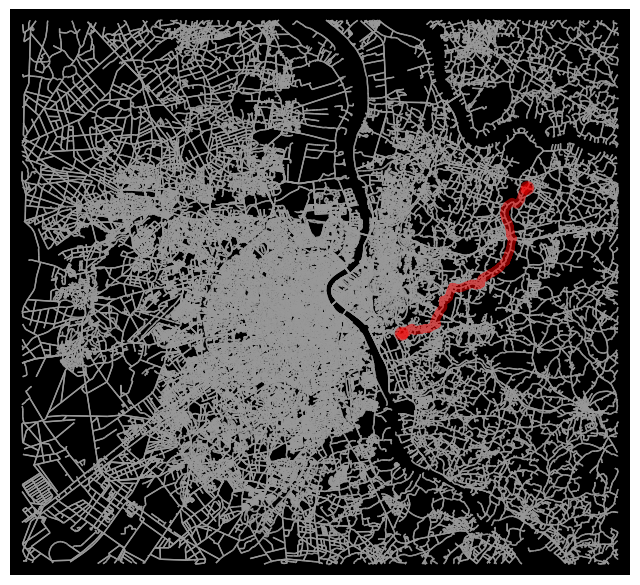

In [39]:
fig, ax = ox.plot_graph_route(graph, route, route_linewidth=6, node_size=0, bgcolor='k')

In [ ]:
# récupération des linestrings des nodes du graph puis des edges
# affichage des edges sur folium

In [42]:
cycling_nodes.head()

,lon,timestamp,tags,lat,version,visible,changeset,id,geometry
0,-0.707743,0,None,44.893398,0,False,0,5693915680,POINT (-0.70774 44.89340)
1,-0.707446,0,None,44.893181,0,False,0,1710078374,POINT (-0.70745 44.89318)
2,-0.707343,0,None,44.893124,0,False,0,29556603,POINT (-0.70734 44.89312)
3,-0.705522,0,None,44.891846,0,False,0,1828300760,POINT (-0.70552 44.89185)
4,-0.704724,0,None,44.891300,0,False,0,29556553,POINT (-0.70472 44.89130)


In [44]:
path_nodes = cycling_nodes[cycling_nodes["id"].isin(route)]
path_nodes

,lon,timestamp,tags,lat,version,visible,changeset,id,geometry
20102,-0.473266,0,None,44.832253,0,False,0,634604285,POINT (-0.47327 44.83225)
20103,-0.473174,0,None,44.832272,0,False,0,279813862,POINT (-0.47317 44.83227)
20104,-0.473091,0,None,44.832310,0,False,0,3359955282,POINT (-0.47309 44.83231)
20105,-0.473028,0,None,44.832355,0,False,0,279813970,POINT (-0.47303 44.83236)
20106,-0.472982,0,None,44.832409,0,False,0,279813864,POINT (-0.47298 44.83241)
...,...,...,...,...,...,...,...,...,...
430386,-0.437219,0,None,44.850529,0,False,0,11304374809,POINT (-0.43722 44.85053)
430389,-0.437231,0,None,44.850498,0,False,0,11304374826,POINT (-0.43723 44.85050)
430390,-0.437228,0,None,44.850487,0,False,0,11304374851,POINT (-0.43723 44.85049)
430391,-0.437215,0,None,44.850475,0,False,0,11304374849,POINT (-0.43721 44.85048)


In [ ]:
# créer des linestrings à partir des nodes
